<a href="https://colab.research.google.com/github/SeifAllah-BS/Mini_projetAD/blob/main/Miniprojet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Importation

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [184]:
df_isie=pd.read_excel('elections19.xlsx')


In [207]:
isie_sorted = df_isie.sort_values(by="Nombre d'inscrits",ascending=False )
isie_sorted.head(10)

,>60F,>60H,45-60F,45-60H,26-45F,26-45H,18-25F,18-25H,Nombre d'inscrits,Nombre de bureau de vote,Délégation,Région
0,8602,8835,11110,10219,19281,17317,6016,5876,87256,22,Ariana Medina,Ariana
207,6313,6876,8937,10417,14640,14897,5879,6306,74265,21,Sfax Medina,Sfax 2
206,5679,7297,8540,9701,14115,14673,4932,5272,70209,25,Sfax Sud,Sfax 2
205,6046,6878,8287,9226,14809,14792,4564,4762,69364,18,Sfax Ouest,Sfax 2
198,5034,6468,8193,9397,13718,14166,4866,4776,66618,23,Sakiet edaer,Sfax 1
239,3895,5232,7431,7831,14138,13231,5714,5502,62974,30,Gafsa Sud,Gafsa
199,4843,6006,7763,9030,12874,12954,4604,4815,62889,23,Sakiet Ezzit,Sfax 1
48,3985,4690,7223,7769,14279,12661,4999,4464,60070,19,Monastir,Monastir
4,4413,5575,7754,8455,13897,12914,3634,3081,59723,16,La Soukra,Ariana
133,6013,6281,8026,7668,12472,11168,3363,3021,58012,16,mersa,Tunis 2


In [209]:
#inscrits_reg2 = df_isie.groupby(['Région',"Délégation"])["Nombre d'inscrits"].sum()
#inscrits_reg2.head()


#**Nombre des inscrits par région** : 





In [211]:
inscrits_reg = isie_sorted.groupby('Région')["Nombre d'inscrits"].sum()

In [224]:
tInscrits_reg = pd.DataFrame({"Inscrits": inscrits_reg})
tInscrits_reg = tInscrits_reg.sort_values(by="Inscrits",ascending=False )
top10_insc_reg = tInscrits_reg.head(10)
top10_insc_reg

,Inscrits
Région,
Sousse,369842
Ben Arous,361187
Kairouan,331016
Sfax 2,328777
Monastir,324703
Bizerte,324383
Tunis 2,314034
Ariana,308006
Sidi Bouzid,300240


Text(0.5, 1.0, "Nombre d'inscrits par région")

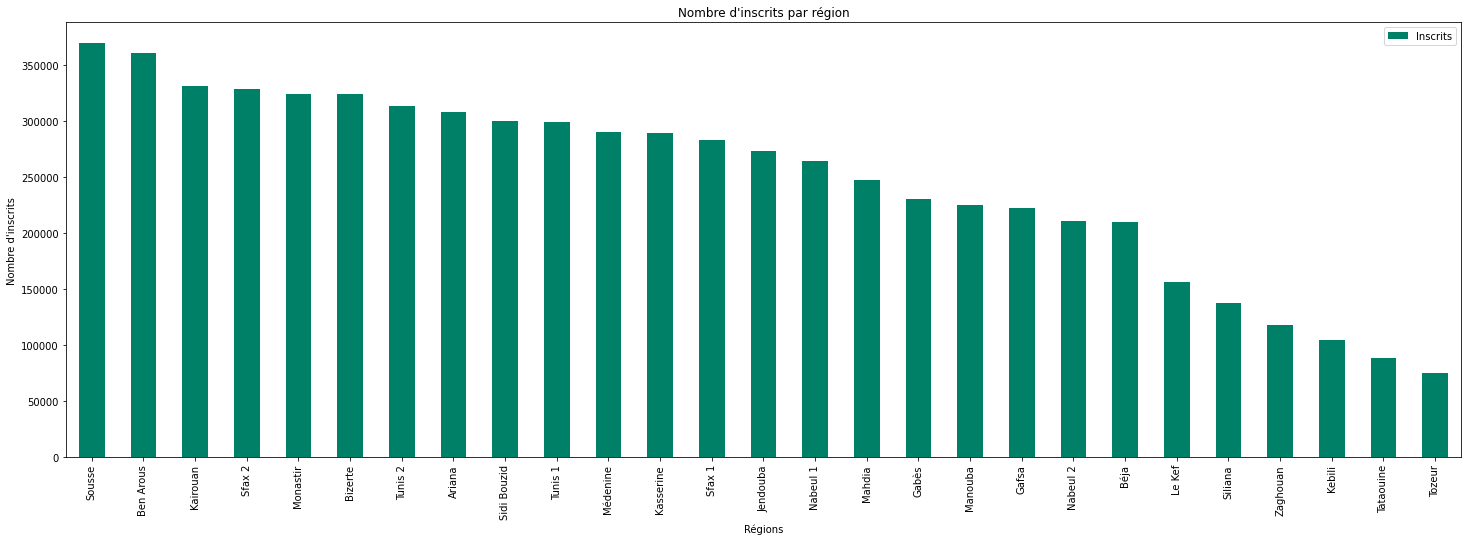

In [213]:
tInscrits_reg.plot(kind='bar',figsize=(25,8),cmap='summer');
plt.xlabel('Régions')
plt.ylabel("Nombre d'inscrits")
plt.title("Nombre d'inscrits par région")


# **Nombre des délégations par région**

In [214]:
deleg_reg = isie_sorted.groupby('Région')['Délégation'].count()
tot_deg = deleg_reg.sum()
df_deleg_reg = pd.DataFrame({"Délégation": deleg_reg,"%":round(100*deleg_reg / tot_deg,1)})
df_deleg_reg.sort_values(by="%",ascending=False )


,Délégation,%
Région,,
Sousse,16,5.8
Bizerte,14,5.1
Kairouan,13,4.7
Sidi Bouzid,13,4.7
Kasserine,13,4.7
Monastir,13,4.7
Gafsa,13,4.7
Le Kef,12,4.4
Ben Arous,12,4.4


In [215]:
tot_deg

274

✅**Il faut avoir 274 comités locales pour assurer une représentation nationale totale**

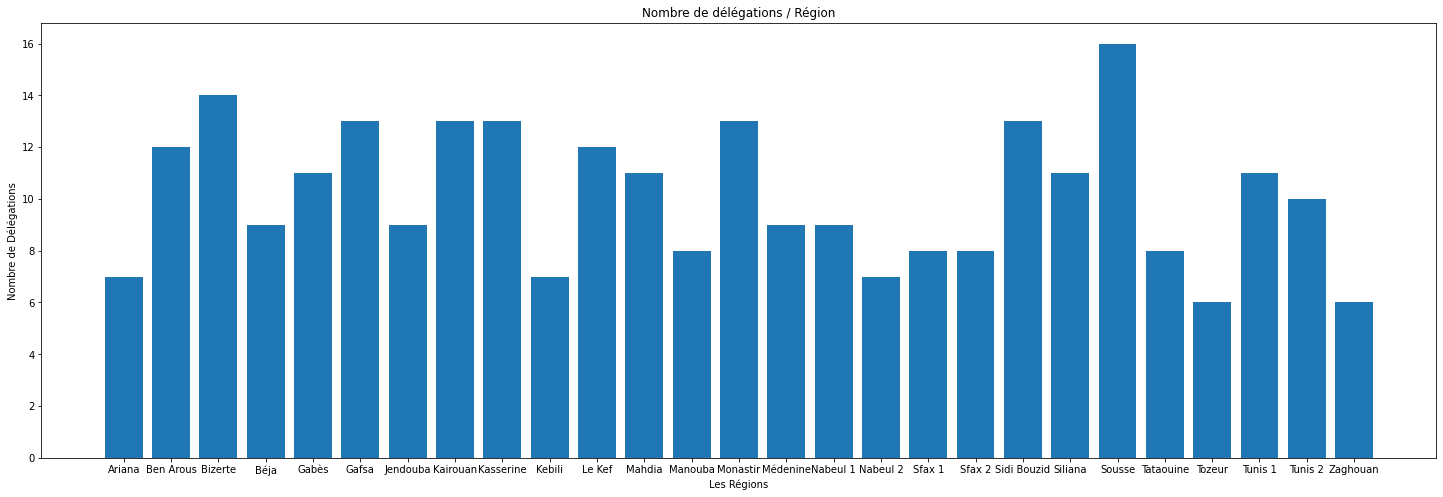

In [216]:
fig, ax = plt.subplots(figsize=(25,8))
p = plt.get_cmap('plasma')
plt.bar(list(df_deleg_reg.index),df_deleg_reg['Délégation'],tick_label=df_deleg_reg.index)
plt.title('Nombre de délégations / Région')
plt.xlabel('Les Régions')
plt.ylabel('Nombre de Délégations') 
plt.show()



1.   Sousse avec 16 Délégations (5.8%)
2.   Bizerte avec 14 Délégations (5.1%)



#**Nombre de bureau de vote par région**


 

In [218]:
bureau_reg = isie_sorted.groupby('Région')['Nombre de bureau de vote '].sum()
tot_bureau = deleg_reg.sum()
df_bureau_reg = pd.DataFrame({"Bureau de vote": bureau_reg})
#df_bureau_reg.sort_values(by="Bureau de vote",ascending=False )

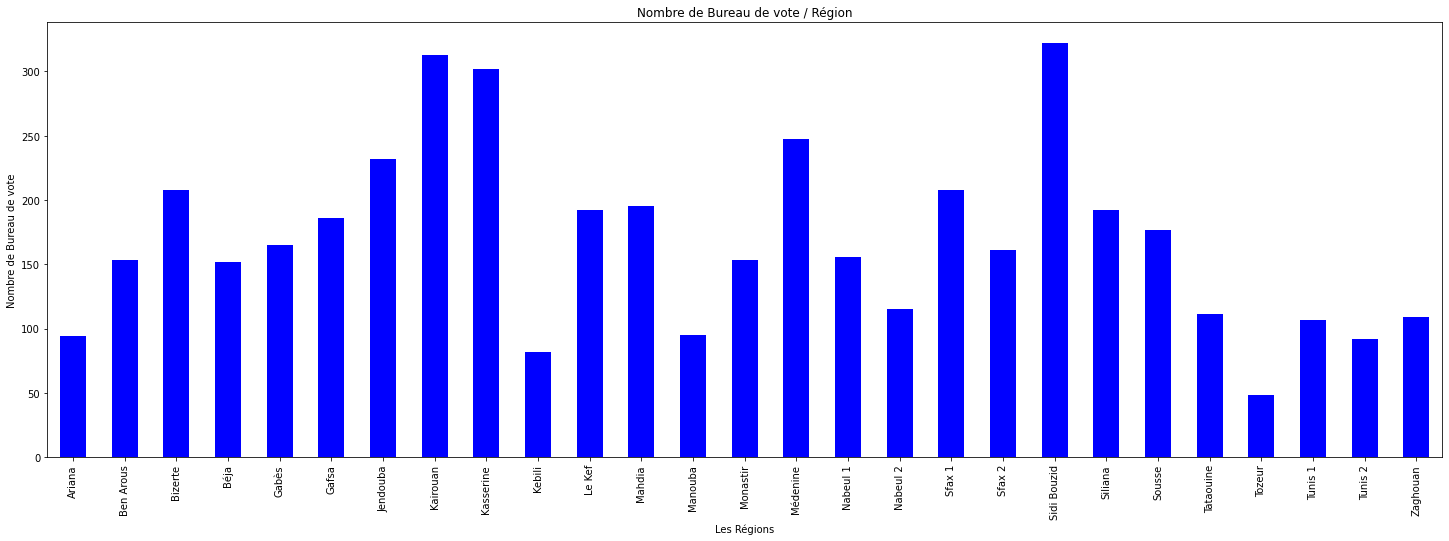

In [219]:
df_bureau_reg['Bureau de vote'].plot(kind='bar',cmap='winter',figsize=(25,8))
plt.title('Nombre de Bureau de vote / Région')
plt.xlabel('Les Régions')
plt.ylabel('Nombre de Bureau de vote') 
plt.show()

# **Comparaison entre le nombre de délégation/région et le nombre d'inscrits**

In [220]:
deleg_reg = df_isie.groupby('Région')['Délégation'].count()
inscrits = df_isie.groupby('Région')["Nombre d'inscrits"].sum()
comparaison_deleg_insc = pd.DataFrame({"Délégations": deleg_reg,
                                        "Nombre d'inscrits": inscrits})
top10_deleg_insc = comparaison_deleg_insc.sort_values(by="Nombre d'inscrits",ascending=False).head(10)
top10_deleg_insc

,Délégations,Nombre d'inscrits
Région,,
Sousse,16,369842
Ben Arous,12,361187
Kairouan,13,331016
Sfax 2,8,328777
Monastir,13,324703
Bizerte,14,324383
Tunis 2,10,314034
Ariana,7,308006
Sidi Bouzid,13,300240


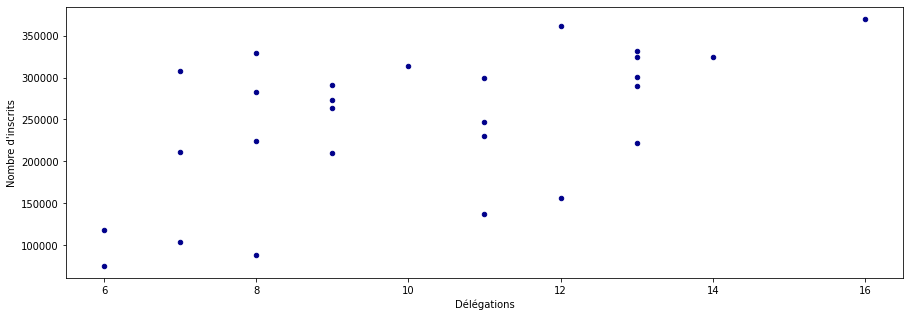

In [221]:
comparaison_deleg_insc.plot(kind='scatter',x='Délégations', y="Nombre d'inscrits", c='DarkBlue',figsize=(15,5))

plt.show()

#**Inscrits par tranche d'age** :



In [198]:
pls60=isie_sorted.groupby('Région')['>60F'].sum()+df_isie.groupby('Région')['>60H'].sum()
bet45_60=isie_sorted.groupby('Région')['45-60F'].sum()+df_isie.groupby('Région')['45-60H'].sum()
bet26_45=isie_sorted.groupby('Région')['26-45F'].sum()+df_isie.groupby('Région')['26-45H'].sum()
bet18_25=isie_sorted.groupby('Région')['18-25F'].sum()+df_isie.groupby('Région')['18-25H'].sum()
df_age = pd.DataFrame({">60": pls60,"]45-60]": bet45_60,"[26-45]": bet26_45,"[18-25]":bet18_25,"total":inscrits_reg})
df_age.sort_values(by="total",ascending=False )

,>60,]45-60],[26-45],[18-25],total
Région,,,,,
Sousse,60515,93642,166677,49008,369842
Ben Arous,65949,99390,150660,45188,361187
Kairouan,54626,77653,147761,50976,331016
Sfax 2,56216,83129,141957,47475,328777
Monastir,48295,80651,146118,49639,324703
Bizerte,65512,86291,131420,41160,324383
Tunis 2,67528,86473,125667,34366,314034
Ariana,55532,80265,132869,39340,308006
Sidi Bouzid,46794,66489,142429,44528,300240


In [199]:
df_age_perc = pd.DataFrame({"%>60": round(pls60/inscrits_reg*100),"%]45-60]": round(bet45_60/inscrits_reg*100,1),"%[26-45]": round(bet26_45/inscrits_reg*100,1),"%[18-25]":round(bet18_25/inscrits_reg*100,1)})
df_age_perc

,%>60,%]45-60],%[26-45],%[18-25]
Région,,,,
Ariana,18.0,26.1,43.1,12.8
Ben Arous,18.0,27.5,41.7,12.5
Bizerte,20.0,26.6,40.5,12.7
Béja,20.0,25.6,40.9,13.0
Gabès,17.0,24.0,44.0,14.8
Gafsa,16.0,24.1,45.4,14.8
Jendouba,21.0,24.0,40.4,14.5
Kairouan,17.0,23.5,44.6,15.4
Kasserine,15.0,21.3,47.1,16.5


In [201]:
jeunes=df_age_perc.groupby(['Région'])['%[18-25]'].sum()
df_jeunes1 = pd.DataFrame({"Nombre":bet18_25,"%":jeunes})
df_jeunes1.sort_values(by="%",ascending=False).head(5)

,Nombre,%
Région,,
Kasserine,47834,16.5
Tataouine,14211,16.1
Kairouan,50976,15.4
Monastir,49639,15.3
Tozeur,11551,15.3


# **Inscrits par genre**

In [202]:
femmes_reg=isie_sorted.groupby('Région')['>60F'].sum()+df_isie.groupby('Région')['45-60F'].sum()+isie_sorted.groupby('Région')['26-45F'].sum()+isie_sorted.groupby('Région')['18-25F'].sum()
hommes_reg=isie_sorted.groupby('Région')['>60H'].sum()+df_isie.groupby('Région')['45-60H'].sum()+isie_sorted.groupby('Région')['26-45H'].sum()+isie_sorted.groupby('Région')['18-25H'].sum()
pd.DataFrame({"Femmes": femmes_reg,
              "Hommes" : hommes_reg,
              "Total": inscrits_reg,
              "% Femmes": round(femmes_reg/inscrits_reg*100,1),
              "% Hommes": round(hommes_reg/inscrits_reg*100,1),
              })

,Femmes,Hommes,Total,% Femmes,% Hommes
Région,,,,,
Ariana,153575,154431,308006,49.9,50.1
Ben Arous,179862,181325,361187,49.8,50.2
Bizerte,162338,162045,324383,50.0,50.0
Béja,105473,104417,209890,50.3,49.7
Gabès,116652,114022,230674,50.6,49.4
Gafsa,110005,112149,222154,49.5,50.5
Jendouba,136515,136870,273385,49.9,50.1
Kairouan,159460,171556,331016,48.2,51.8
Kasserine,142098,147446,289544,49.1,50.9


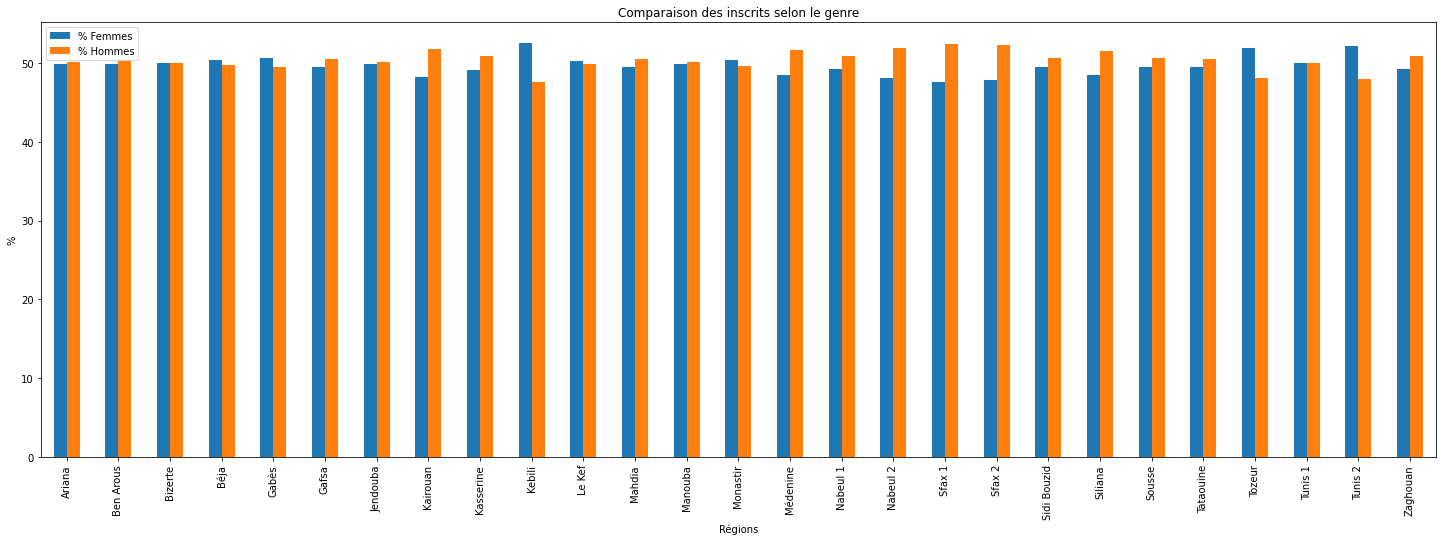

In [203]:
df_genre = pd.DataFrame({"% Femmes": round(femmes_reg/inscrits_reg*100,1),
              "% Hommes": round(hommes_reg/inscrits_reg*100,1),})
df_genre.plot(kind='bar',figsize=(25,8));
plt.xlabel('Régions')
plt.ylabel('%')
plt.title('Comparaison des inscrits selon le genre');